In [459]:
import pandas as pd
import json
from pandas.io.json import json_normalize  
import numpy as np
from tabulate import tabulate

In [235]:
import matplotlib.pyplot as plt
%matplotlib inline

In [581]:
def stats_analysis(df):
    df2 = pd.DataFrame(df.stats.values.tolist(), index=df.index.values)
    df3 = df2.loc[~df2.index.str.contains("None")]
    
    df_time_access = pd.DataFrame(df3.time_access.values.tolist(), index=df3.index.values)
    df_time_access = df_time_access.fillna(0)
    
    counts = df_time_access.values.flatten()
    counts2 = counts[(counts>0) & (counts<120)]
    
    ratios = []
    cl = len(counts2)
    for i in range(1, 11):
        ratios.append(len(counts2[counts2==i])/cl)
        
        
    step_groupings = []
    cs = sum(counts2)
    for i in range(1, 21):
        step_groupings.append((i, sum(counts2[counts2>i])/cs))
        
    step_groupings = np.array(step_groupings)
    l1, l2 = zip(*step_groupings)
    print(tabulate(step_groupings))
    
    
    step_groupings_pd = pd.DataFrame()
    step_groupings_pd['bound'] = l1
    step_groupings_pd['fraction'] = l2

    print("avg per step")
    print(np.average(counts2))
    
    
    print("median per step")
    print(np.median(counts2))
    
    plt.plot(step_groupings_pd['bound'], step_groupings_pd['fraction'])
    plt.xlabel("visits per step")
    plt.ylabel("fraction of total visits")
    plt.show()
    
    
    plt.bar(range(1,11), np.array(ratios))
    plt.xlabel("traversals per step")
    plt.ylabel("fraction of total traversals")
    plt.show()
    
    
    plt.hist(counts2, bins=int(max(counts2)))
    plt.xlabel("traversals per step")
    plt.ylabel("count")
    plt.show()
    
    
    plt.plot(df2.groupby('source_neighbors').mean()['count'])
    plt.xlabel("count of traversals")
    plt.ylabel("source node neighbors")
    plt.show()
    
    
    count_mean = df2.groupby('source_neighbors').mean()['count']
    count_mean_limit_100 = count_mean[count_mean.index < 100]
    count_mean_limit_50 = count_mean[count_mean.index < 50]
    count_mean_limit_10 = count_mean[count_mean.index < 10]
    
    
    plt.plot(count_mean_limit_100)
    plt.title("count_mean_limit_100")
    plt.ylabel("count of traversals")
    plt.xlabel("source node neighbors")
    plt.show()
    
    
    plt.plot(count_mean_limit_50)
    plt.title("count_mean_limit_50")
    plt.ylabel("count of traversals")
    plt.xlabel("source node neighbors")
    plt.show()
    
    
    plt.plot(count_mean_limit_10)
    plt.title("count_mean_limit_10")
    plt.ylabel("count of traversals")
    plt.xlabel("source node neighbors")
    plt.show()
    
    
    plt.plot(df2.groupby('target_neighbors').mean()['count'])
    plt.title("target count")
    plt.ylabel("count of traversals")
    plt.xlabel("target node neighbors")
    plt.show()
    
    
    print("count mean")
    print(df2['count'].mean())
    print("count max")
    print(max(df2['count']))
    
    
    count_groups = df2.groupby('count').size()
    
    groupings_percentages = []
    for i in range(1, max(df2['count']), 5):
        groupings_percentages.append((i, sum(count_groups[count_groups.index >= i])/sum(count_groups)))
    groupings_percentages = np.array(groupings_percentages)
    
    l1, l2 = zip(*groupings_percentages)
    pd_groupings = pd.DataFrame()
    pd_groupings['fraction'] = l2
    pd_groupings['bound'] = l1
    
    pd_groupings_sig = pd_groupings[(pd_groupings['fraction'] > 0.05) & (pd_groupings['fraction'] < 0.95)]
    
    print(tabulate(pd_groupings_sig))
    
    
    plt.plot(pd_groupings_sig['bound'], pd_groupings_sig['fraction'])
    plt.xlabel("visits in total")
    plt.ylabel("fraction on total visits")
    plt.show()
    
    
    plt.plot(df2.groupby('count').size())
    plt.xlabel("visits per edge")
    plt.ylabel("number of occurrences")
    plt.show()
    
    count_groups = df2.groupby('count').size()
    count_groups_500 = count_groups[count_groups < 500]
    count_groups[count_groups < 10]

In [565]:
df = pd.read_json("data/stats.json")

In [476]:
df1 = pd.read_json("data/stats1.json")

In [570]:
df128 = pd.read_json("data/stats_20_10_128.json")
df32 = pd.read_json("data/stats_20_10_32.json")
df1 = pd.read_json("data/stats_20_10_1.json")

In [574]:
df_100_1024 = pd.read_json("data/stats_120_100_1024.json")
df_100_512 = pd.read_json("data/stats_120_100_512.json")
df_100_128 = pd.read_json("data/stats_120_100_128.json")
df_100_32 = pd.read_json("data/stats_120_100_32.json")
df_100_16 = pd.read_json("data/stats_120_100_16.json")
df_100_1 = pd.read_json("data/stats_120_100_1.json")

In [592]:
df1 = pd.read_json("data/stats_20_20_1.json")
df16 = pd.read_json("data/stats_20_20_16.json")
df64 = pd.read_json("data/stats_20_20_64.json")

--  ---------
 1  0.211706
 2  0.141667
 3  0.108929
 4  0.0906746
 5  0.0787698
 6  0.0698413
 7  0.0628968
 8  0.0589286
 9  0.0508929
10  0.0429563
11  0.0364087
12  0.0364087
13  0.035119
14  0.0337302
15  0.0337302
16  0.0337302
17  0.0337302
18  0.0337302
19  0.0337302
20  0
--  ---------
avg per step
1.178809495965384
median per step
1.0


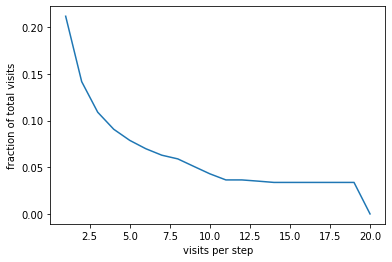

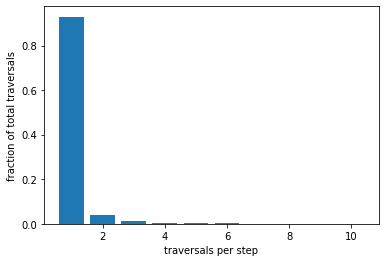

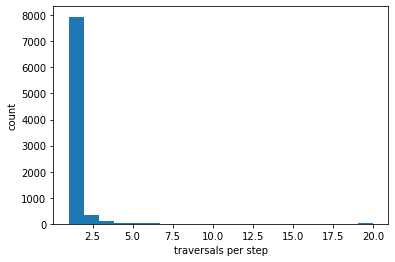

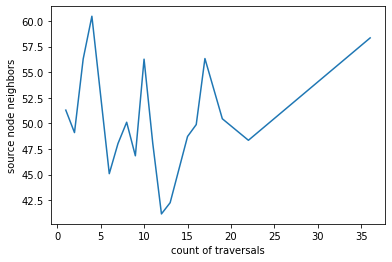

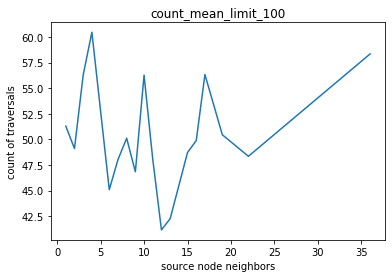

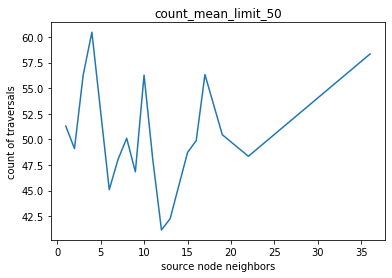

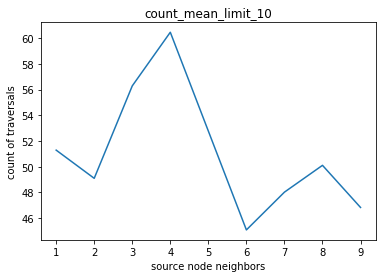

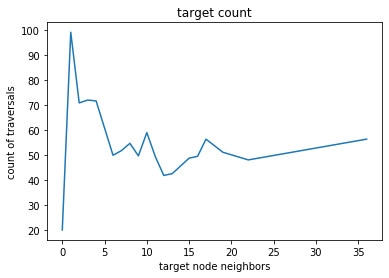

count mean
50.01709401709402
count max
139
--  ---------  --
 4  0.868376   21
 5  0.868376   26
 6  0.861538   31
 7  0.820513   36
 8  0.752137   41
 9  0.613675   46
10  0.45641    51
11  0.300855   56
12  0.194872   61
13  0.147009   66
14  0.104274   71
15  0.0752137  76
16  0.0598291  81
--  ---------  --


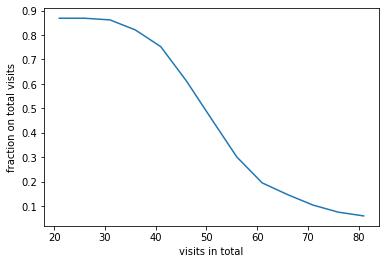

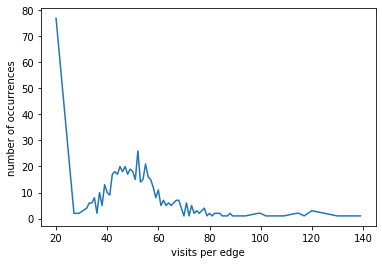

In [593]:
stats_analysis(df1)

--  ----------
 1  0.809873
 2  0.600814
 3  0.411807
 4  0.261781
 5  0.170433
 6  0.115471
 7  0.0894656
 8  0.0727735
 9  0.057201
10  0.0541476
11  0.04743
12  0.0431552
13  0.0398473
14  0.0341476
15  0.0310941
16  0.0262087
17  0.021883
18  0.0200509
19  0.0200509
20  0.00274809
--  ----------
avg per step
2.3047149894440535
median per step
2.0


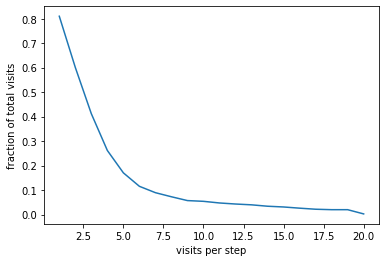

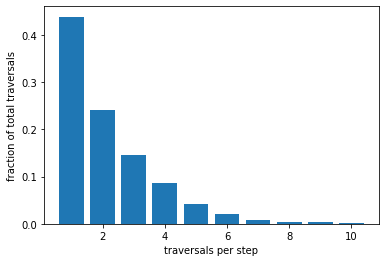

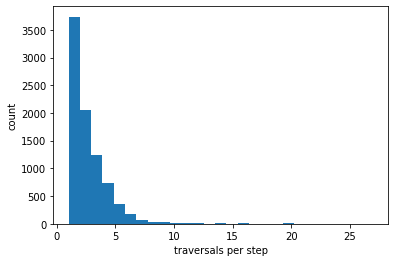

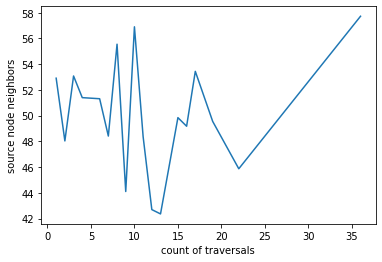

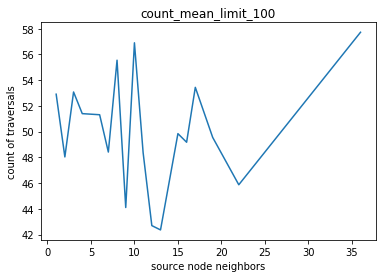

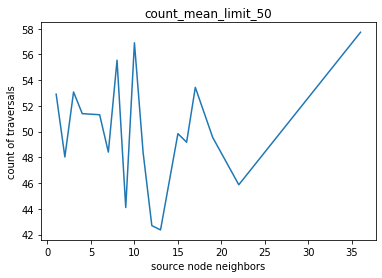

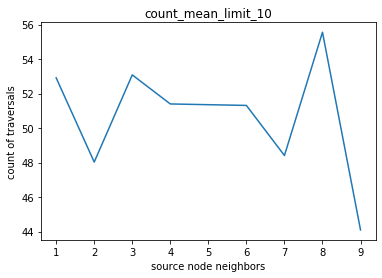

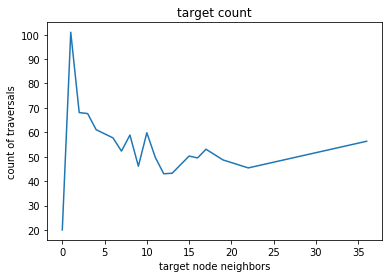

count mean
50.01709401709402
count max
158
--  ---------  --
 4  0.868376   21
 5  0.863248   26
 6  0.854701   31
 7  0.82735    36
 8  0.740171   41
 9  0.608547   46
10  0.482051   51
11  0.324786   56
12  0.203419   61
13  0.128205   66
14  0.0974359  71
15  0.0649573  76
--  ---------  --


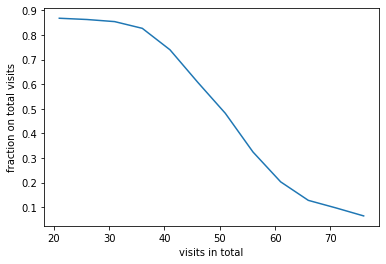

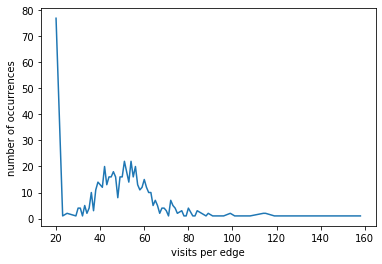

In [594]:
stats_analysis(df64)

In [ ]:
stats_analysis(df_100_1024)

--  --------
 1  0.906894
 2  0.784298
 3  0.673357
 4  0.581389
 5  0.505611
 6  0.442678
 7  0.390064
 8  0.34569
 9  0.308008
10  0.275962
11  0.248726
12  0.225176
13  0.20496
14  0.187097
15  0.171421
16  0.157576
17  0.145212
18  0.13429
19  0.124666
20  0.115982
--  --------
avg per step
3.6294151432262503
median per step
2.0


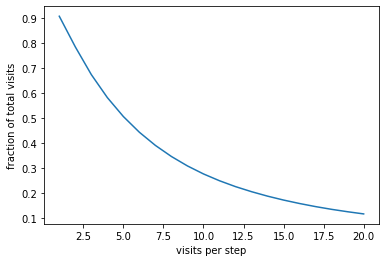

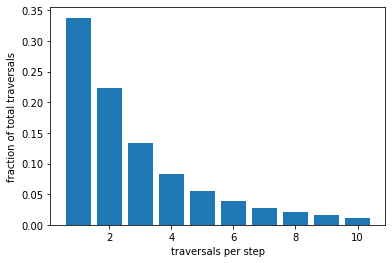

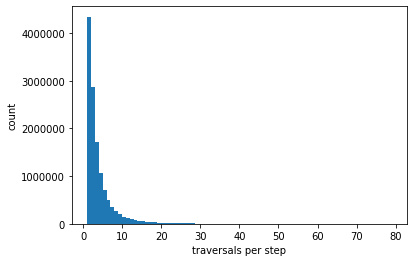

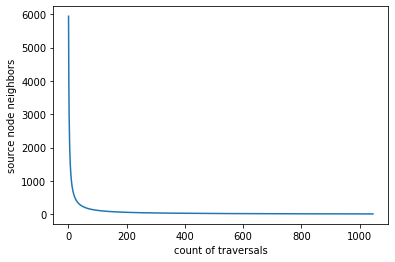

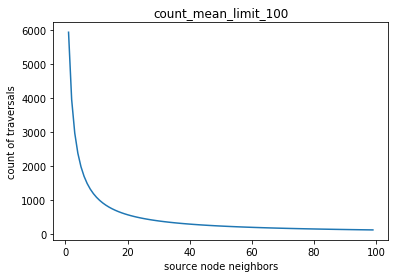

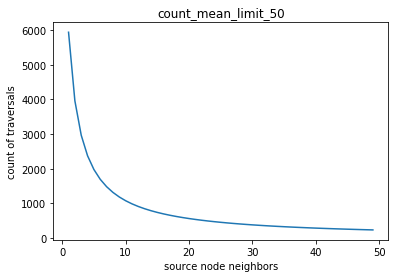

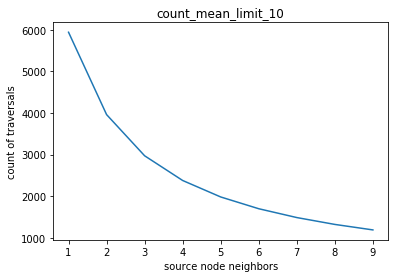

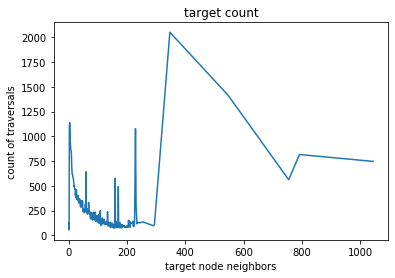

count mean
265.8252588542273
count max
11760
---  ---------  ---
 11  0.937365    56
 12  0.905538    61
 13  0.867867    66
 14  0.829148    71
 15  0.793797    76
 16  0.762015    81
 17  0.733789    86
 18  0.706626    91
 19  0.680821    96
 20  0.656778   101
 21  0.634164   106
 22  0.61314    111
 23  0.594226   116
 24  0.553668   121
 25  0.536145   126
 26  0.519747   131
 27  0.504739   136
 28  0.49074    141
 29  0.476929   146
 30  0.463639   151
 31  0.451102   156
 32  0.438825   161
 33  0.426582   166
 34  0.414887   171
 35  0.403563   176
 36  0.392301   181
 37  0.381764   186
 38  0.371792   191
 39  0.362606   196
 40  0.353576   201
 41  0.345      206
 42  0.337012   211
 43  0.329273   216
 44  0.321738   221
 45  0.314514   226
 46  0.307822   231
 47  0.300958   236
 48  0.29416    241
 49  0.287662   246
 50  0.281601   251
 51  0.27584    256
 52  0.270399   261
 53  0.265286   266
 54  0.260372   271
 55  0.255503   276
 56  0.250954   281
 57  0.246367  

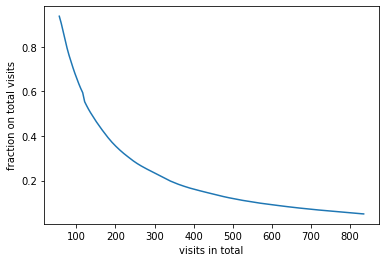

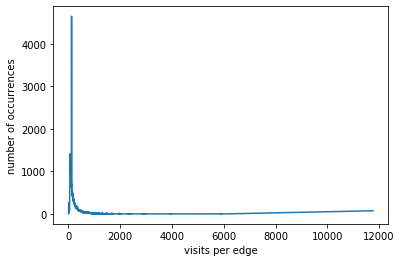

In [583]:
stats_analysis(df_100_512)

--  --------
 1  0.906877
 2  0.784399
 3  0.673442
 4  0.581401
 5  0.505552
 6  0.442782
 7  0.39012
 8  0.345674
 9  0.307966
10  0.275998
11  0.24867
12  0.225158
13  0.20489
14  0.187109
15  0.171627
16  0.157715
17  0.145372
18  0.134406
19  0.124637
20  0.115971
--  --------
avg per step
3.629652238369015
median per step
2.0


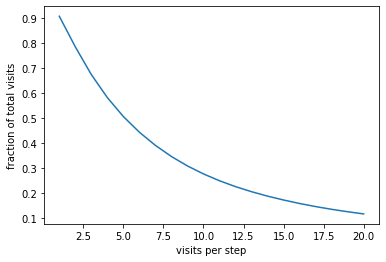

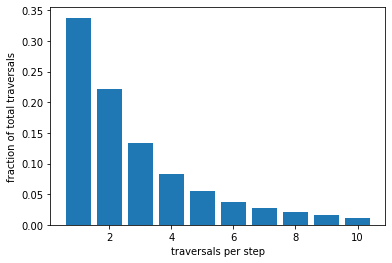

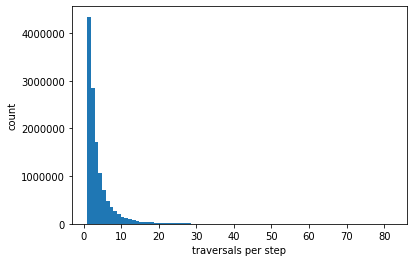

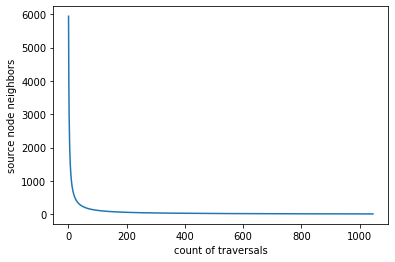

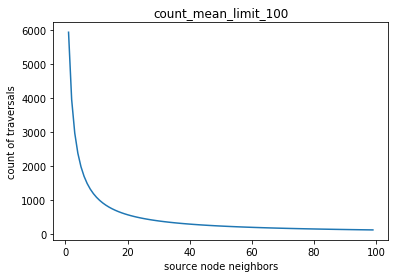

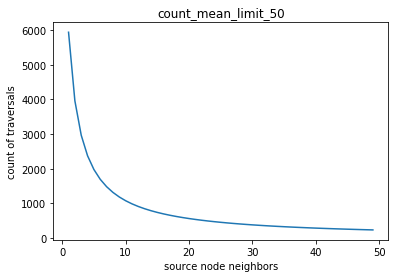

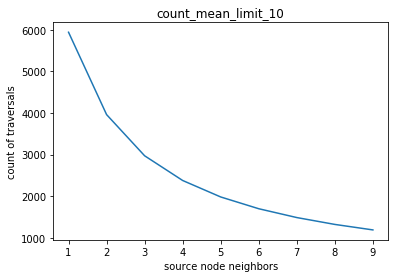

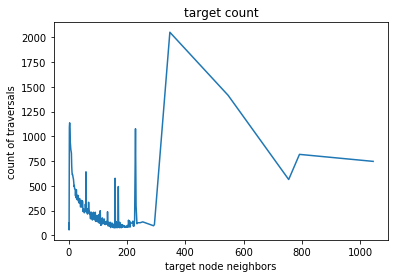

count mean
265.8252588542273
count max
11760
---  ---------  ---
 11  0.937515    56
 12  0.906026    61
 13  0.867678    66
 14  0.829275    71
 15  0.793482    76
 16  0.761843    81
 17  0.732708    86
 18  0.706255    91
 19  0.681015    96
 20  0.657149   101
 21  0.634446   106
 22  0.613777   111
 23  0.59447    116
 24  0.553657   121
 25  0.536234   126
 26  0.520656   131
 27  0.504618   136
 28  0.490075   141
 29  0.47658    146
 30  0.463267   151
 31  0.450764   156
 32  0.438487   161
 33  0.42677    166
 34  0.415181   171
 35  0.403602   176
 36  0.39265    181
 37  0.38188    186
 38  0.37208    191
 39  0.36249    196
 40  0.353399   201
 41  0.344801   206
 42  0.336696   211
 43  0.328951   216
 44  0.321832   221
 45  0.314885   226
 46  0.307838   231
 47  0.300875   236
 48  0.294066   241
 49  0.287512   246
 50  0.281629   251
 51  0.275629   256
 52  0.270449   261
 53  0.265358   266
 54  0.260538   271
 55  0.255979   276
 56  0.251348   281
 57  0.246539  

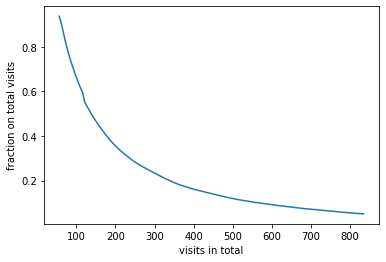

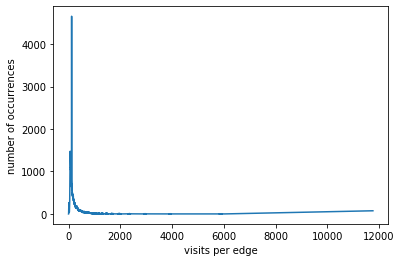

In [584]:
stats_analysis(df_100_128)

--  --------
 1  0.906886
 2  0.784279
 3  0.673282
 4  0.581231
 5  0.505516
 6  0.442772
 7  0.390199
 8  0.345873
 9  0.308049
10  0.275927
11  0.248688
12  0.225151
13  0.204893
14  0.187041
15  0.171322
16  0.157519
17  0.145223
18  0.134369
19  0.124657
20  0.116058
--  --------


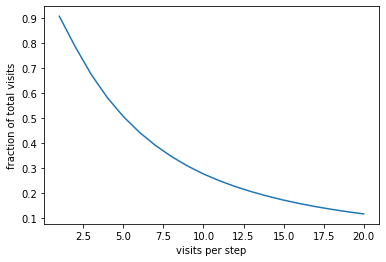

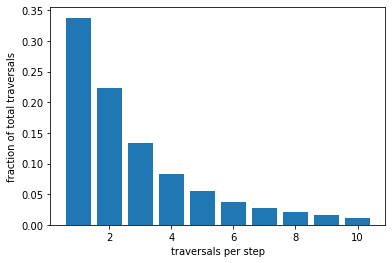

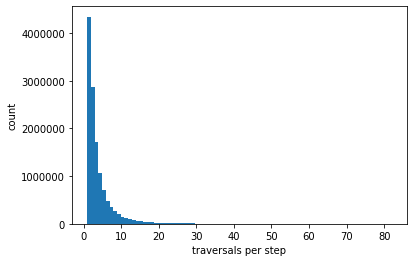

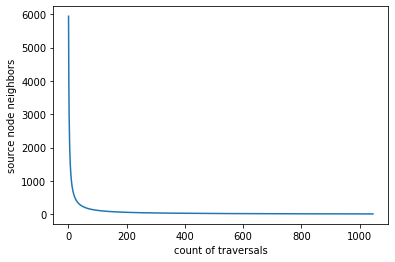

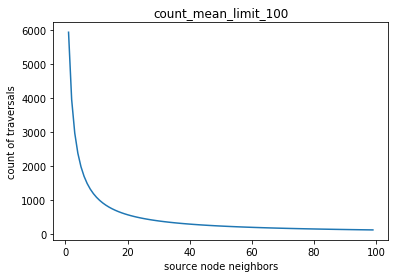

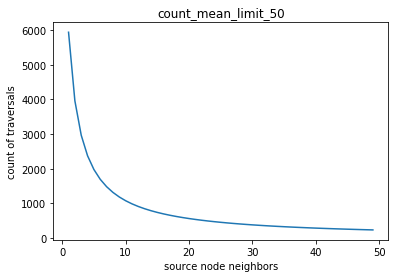

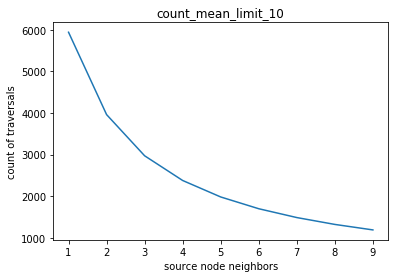

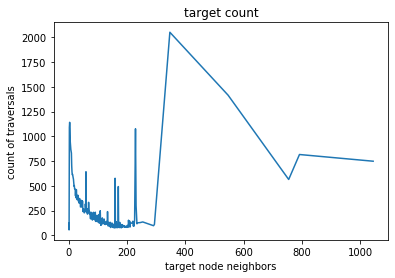

count mean
265.8252588542273
count max
11760
---  ---------  ---
 11  0.937166    56
 12  0.905029    61
 13  0.867988    66
 14  0.829818    71
 15  0.794523    76
 16  0.762231    81
 17  0.733495    86
 18  0.706709    91
 19  0.680899    96
 20  0.656905   101
 21  0.634219   106
 22  0.613417   111
 23  0.593678   116
 24  0.553524   121
 25  0.536262   126
 26  0.519653   131
 27  0.504618   136
 28  0.490236   141
 29  0.476912   146
 30  0.463827   151
 31  0.451506   156
 32  0.439218   161
 33  0.426554   166
 34  0.414765   171
 35  0.403148   176
 36  0.392245   181
 37  0.381431   186
 38  0.371371   191
 39  0.362219   196
 40  0.353216   201
 41  0.34494    206
 42  0.337627   211
 43  0.329716   216
 44  0.32217    221
 45  0.314359   226
 46  0.307329   231
 47  0.30057    236
 48  0.293673   241
 49  0.287479   246
 50  0.281551   251
 51  0.275845   256
 52  0.270621   261
 53  0.265463   266
 54  0.260538   271
 55  0.255846   276
 56  0.251231   281
 57  0.246821  

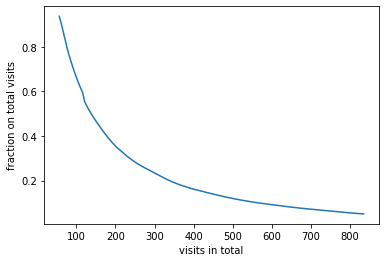

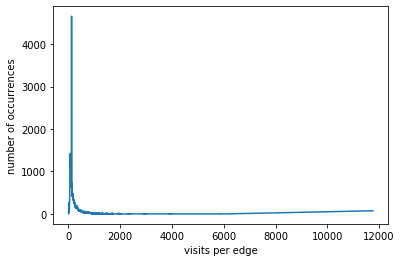

In [578]:
stats_analysis(df_100_32)

--  --------
 1  0.90693
 2  0.784423
 3  0.673359
 4  0.581252
 5  0.505499
 6  0.442813
 7  0.390213
 8  0.345687
 9  0.308121
10  0.276019
11  0.248803
12  0.225254
13  0.204907
14  0.187067
15  0.171484
16  0.157658
17  0.145373
18  0.134618
19  0.124788
20  0.116102
--  --------


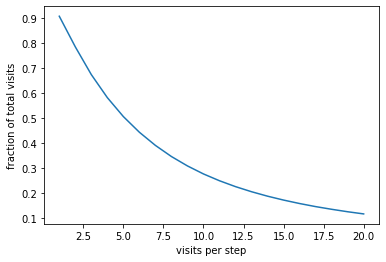

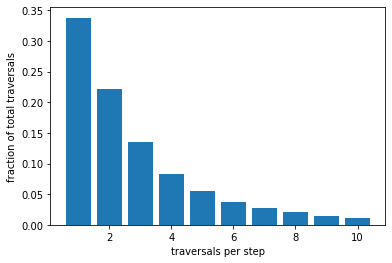

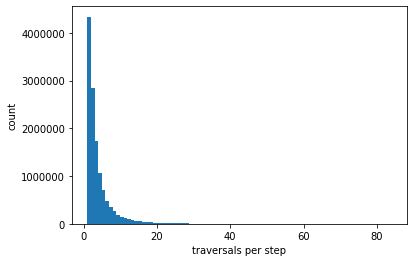

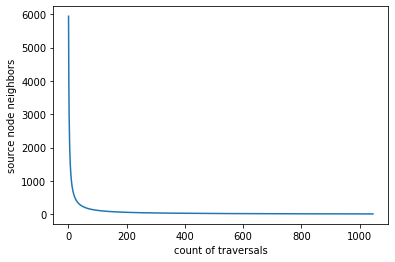

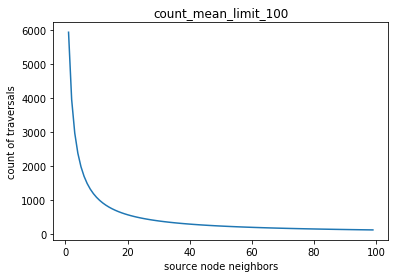

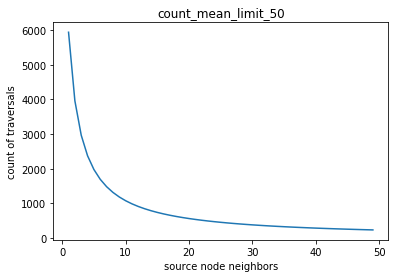

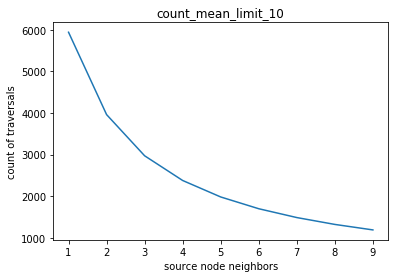

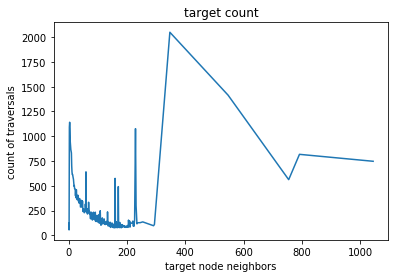

count mean
265.8252588542273
count max
11760
---  ---------  ---
 11  0.937393    56
 12  0.905644    61
 13  0.867617    66
 14  0.828932    71
 15  0.793731    76
 16  0.762563    81
 17  0.733927    86
 18  0.706726    91
 19  0.680633    96
 20  0.656811   101
 21  0.634275   106
 22  0.613677   111
 23  0.59411    116
 24  0.553364   121
 25  0.535918   126
 26  0.51967    131
 27  0.504906   136
 28  0.490324   141
 29  0.476901   146
 30  0.46391    151
 31  0.450836   156
 32  0.438387   161
 33  0.426416   166
 34  0.415164   171
 35  0.403829   176
 36  0.39296    181
 37  0.382013   186
 38  0.371576   191
 39  0.362169   196
 40  0.353521   201
 41  0.344962   206
 42  0.337084   211
 43  0.329178   216
 44  0.321783   221
 45  0.314874   226
 46  0.307384   231
 47  0.300348   236
 48  0.293989   241
 49  0.287612   246
 50  0.28164    251
 51  0.276067   256
 52  0.270593   261
 53  0.265591   266
 54  0.260461   271
 55  0.255907   276
 56  0.251192   281
 57  0.246605  

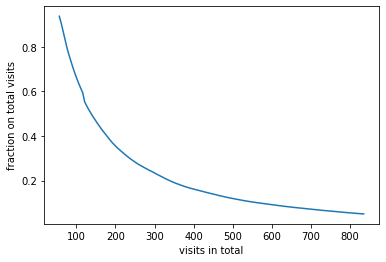

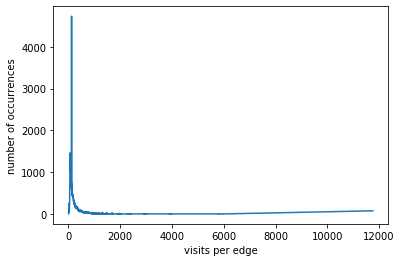

In [579]:
stats_analysis(df_100_16)

--  --------
 1  0.906936
 2  0.784136
 3  0.67331
 4  0.581431
 5  0.505794
 6  0.442805
 7  0.390171
 8  0.345672
 9  0.30812
10  0.276062
11  0.248621
12  0.225193
13  0.204722
14  0.186997
15  0.171433
16  0.157555
17  0.145331
18  0.134438
19  0.124625
20  0.115976
--  --------


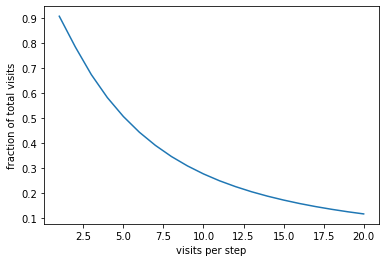

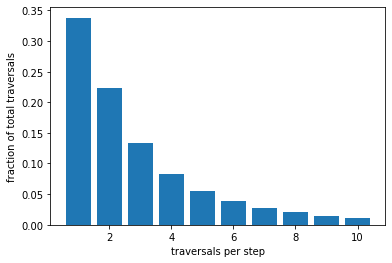

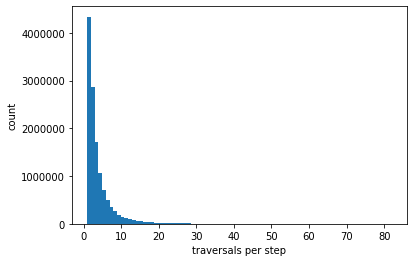

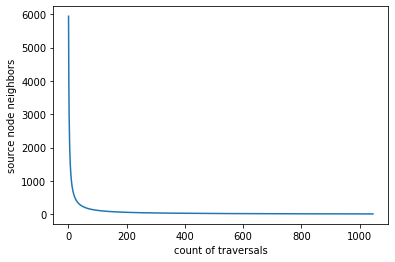

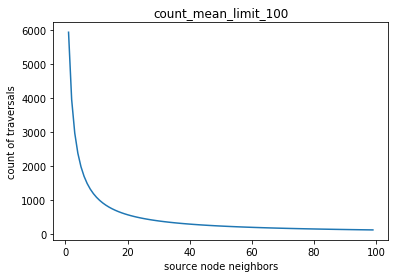

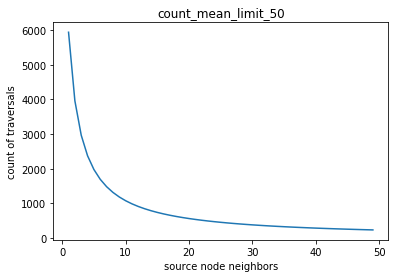

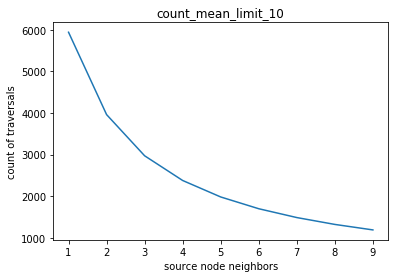

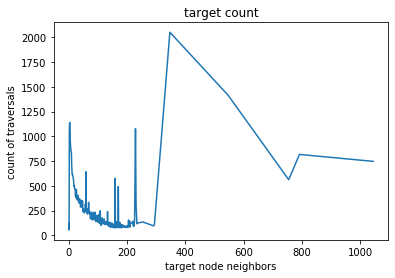

count mean
265.8252588542273
count max
11760
---  ---------  ---
 11  0.937249    56
 12  0.905716    61
 13  0.867246    66
 14  0.829115    71
 15  0.793354    76
 16  0.761943    81
 17  0.734077    86
 18  0.706998    91
 19  0.681048    96
 20  0.657005   101
 21  0.634507   106
 22  0.613611   111
 23  0.593933   116
 24  0.553353   121
 25  0.536411   126
 26  0.519764   131
 27  0.504573   136
 28  0.490396   141
 29  0.476641   146
 30  0.463323   151
 31  0.450996   156
 32  0.438659   161
 33  0.42667    166
 34  0.415103   171
 35  0.403669   176
 36  0.392533   181
 37  0.381991   186
 38  0.371869   191
 39  0.362645   196
 40  0.353792   201
 41  0.345239   206
 42  0.337134   211
 43  0.329023   216
 44  0.321539   221
 45  0.314293   226
 46  0.307423   231
 47  0.300886   236
 48  0.294171   241
 49  0.287507   246
 50  0.281562   251
 51  0.27584    256
 52  0.270355   261
 53  0.265358   266
 54  0.260516   271
 55  0.255702   276
 56  0.251115   281
 57  0.246733  

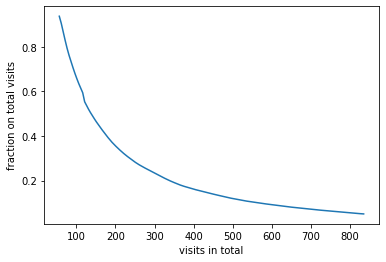

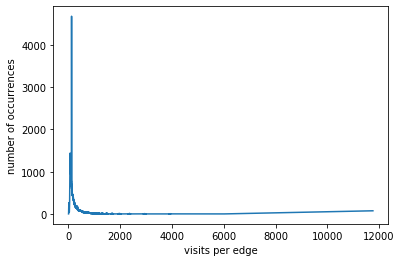

In [580]:
stats_analysis(df_100_1)

--  --------
 1  0.907047
 2  0.785129
 3  0.674854
 4  0.583387
 5  0.508072
 6  0.445686
 7  0.393507
 8  0.349443
 9  0.312054
10  0.280288
11  0.252929
12  0.229341
13  0.208874
14  0.190795
15  0.175073
16  0.161149
17  0.148859
18  0.137787
19  0.127972
20  0.119129
--  --------


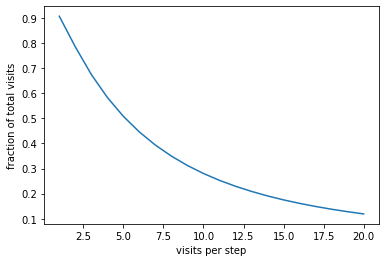

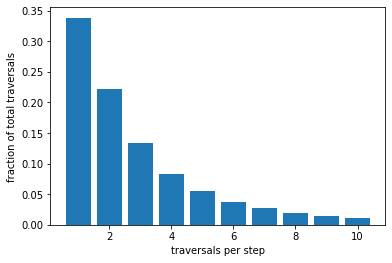

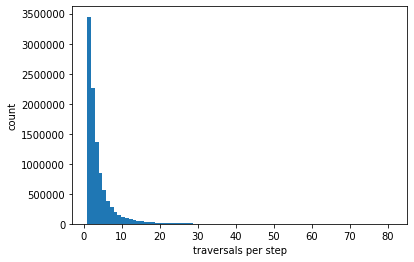

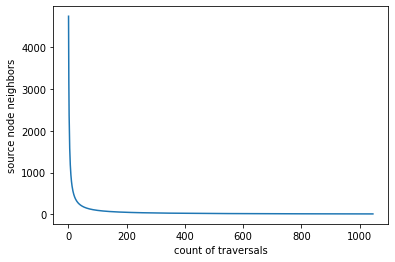

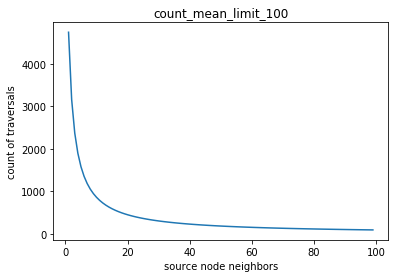

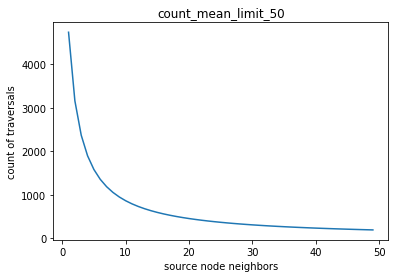

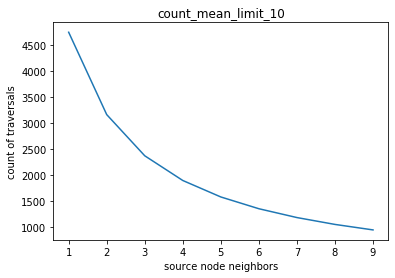

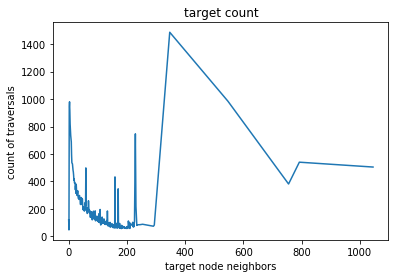

count mean
212.12318635842377
count max
9360
---  ---------  ---
  8  0.945642    41
  9  0.912701    46
 10  0.872437    51
 11  0.829358    56
 12  0.78792     61
 13  0.749345    66
 14  0.713335    71
 15  0.681353    76
 16  0.652191    81
 17  0.624004    86
 18  0.598786    91
 19  0.575751    96
 20  0.553846   101
 21  0.533952   106
 22  0.515038   111
 23  0.497377   116
 24  0.457966   121
 25  0.442371   126
 26  0.427834   131
 27  0.413164   136
 28  0.39984    141
 29  0.387154   146
 30  0.374744   151
 31  0.363011   156
 32  0.351371   161
 33  0.340629   166
 34  0.330713   171
 35  0.321289   176
 36  0.312021   181
 37  0.303202   186
 38  0.294775   191
 39  0.287125   196
 40  0.279701   201
 41  0.272604   206
 42  0.265846   211
 43  0.259081   216
 44  0.252666   221
 45  0.246616   226
 46  0.240556   231
 47  0.23455    236
 48  0.228794   241
 49  0.223421   246
 50  0.218113   251
 51  0.212983   256
 52  0.207909   261
 53  0.203034   266
 54  0.198402  

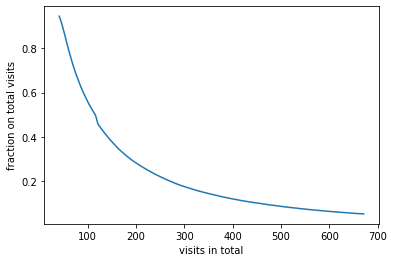

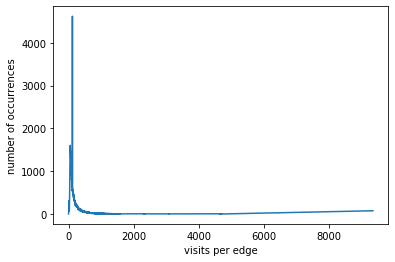

In [566]:
stats_analysis(df)

--  ---------
 1  0.556939
 2  0.317353
 3  0.19879
 4  0.135371
 5  0.0975984
 6  0.0741273
 7  0.058876
 8  0.0480193
 9  0.0395101
10  0.0326705
11  0.0272917
12  0.0233737
13  0.0207787
14  0.0192405
15  0.0188692
16  0.0186216
17  0.018569
18  0.018569
19  0.018569
20  0
--  ---------


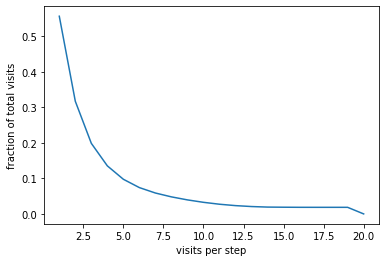

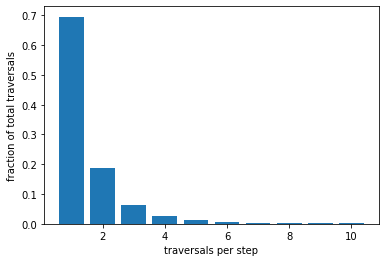

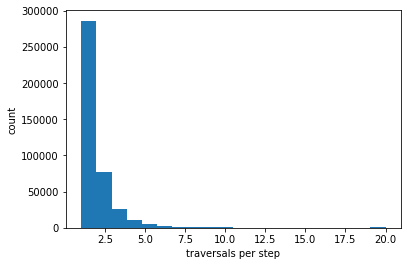

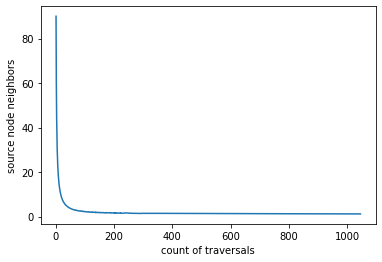

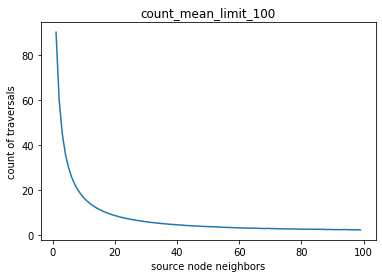

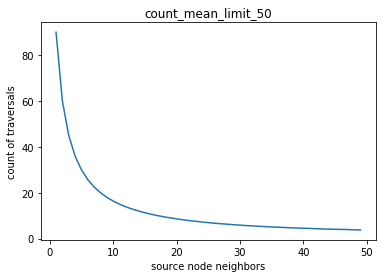

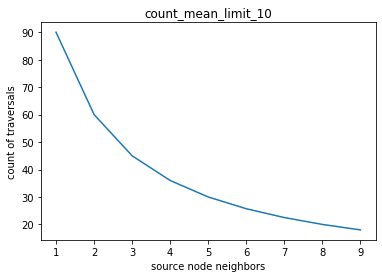

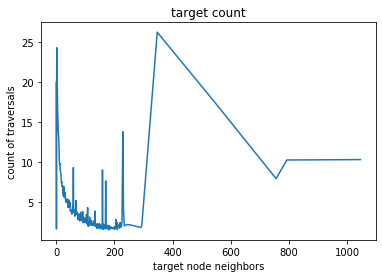

count mean
4.948542024013722
count max
160
-  ---------  --
1  0.243411    6
2  0.108688   11
3  0.0668001  16
-  ---------  --


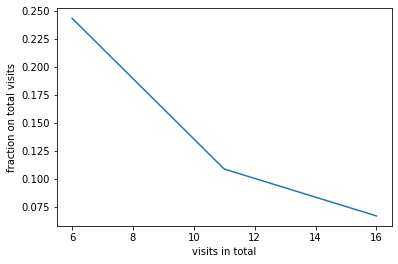

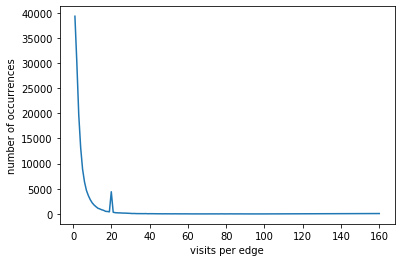

In [571]:
stats_analysis(df1)

--  ---------
 1  0.556069
 2  0.316703
 3  0.197054
 4  0.134699
 5  0.0976232
 6  0.0744213
 7  0.0591916
 8  0.0480131
 9  0.0394621
10  0.0319881
11  0.0264221
12  0.0225597
13  0.0203469
14  0.0191121
15  0.0186711
16  0.0185968
17  0.0185968
18  0.018569
19  0.018569
20  0
--  ---------
avg per step
1.568163067216695
median per step
1.0


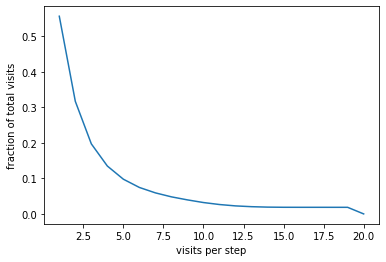

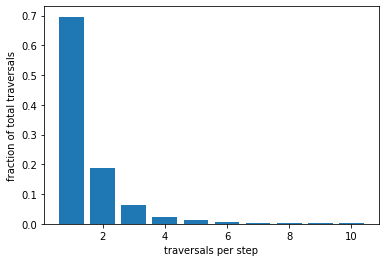

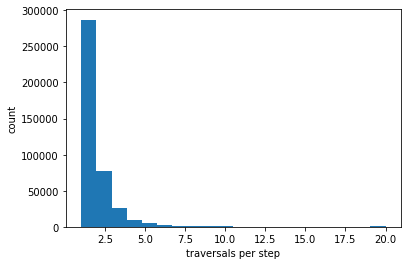

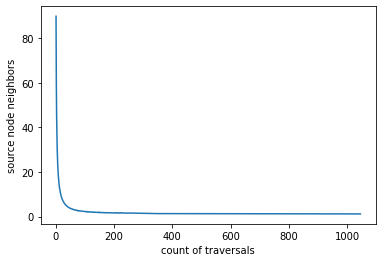

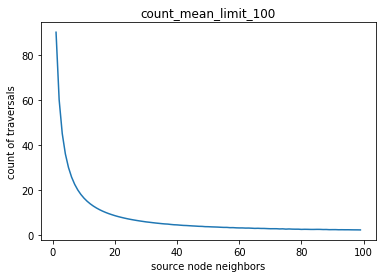

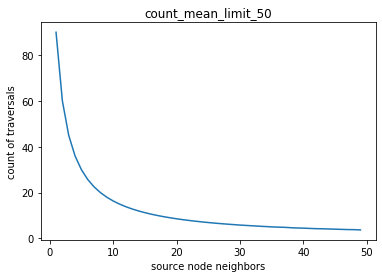

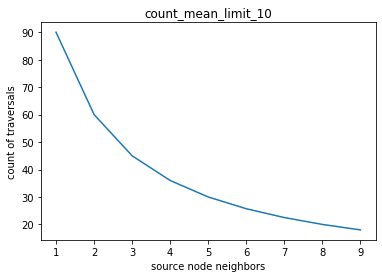

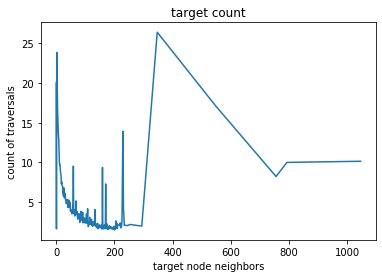

count mean
4.951777686963629
count max
160
-  ---------  --
1  0.243468    6
2  0.108711   11
3  0.0665577  16
-  ---------  --


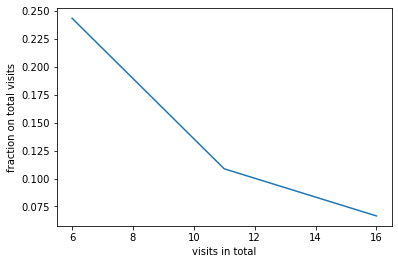

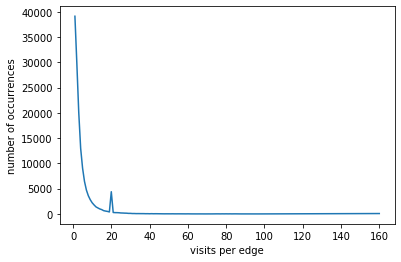

In [585]:
stats_analysis(df32)

--  ---------
 1  0.556411
 2  0.31711
 3  0.197878
 4  0.134979
 5  0.0979806
 6  0.0744166
 7  0.0596419
 8  0.0490329
 9  0.0400084
10  0.0323796
11  0.0267455
12  0.0231617
13  0.0205465
14  0.0193334
15  0.0188227
16  0.0186494
17  0.0185968
18  0.018569
19  0.018569
20  0
--  ---------


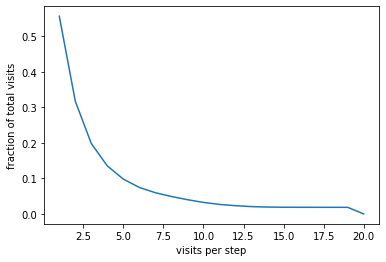

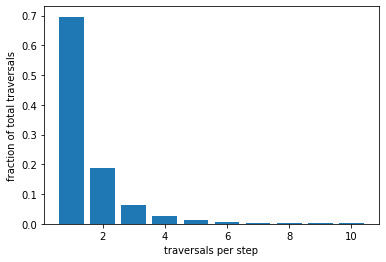

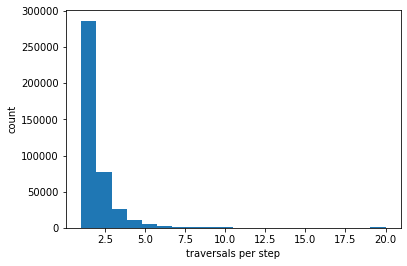

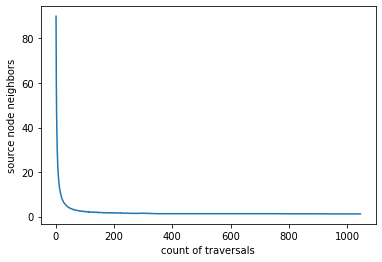

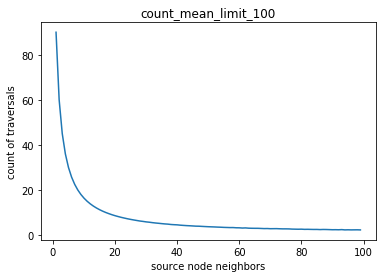

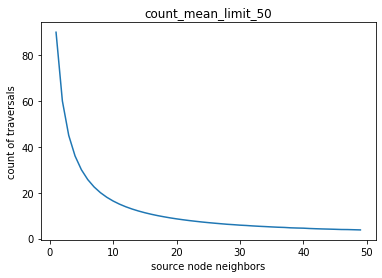

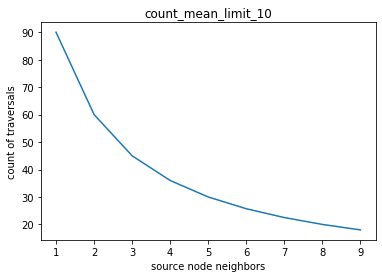

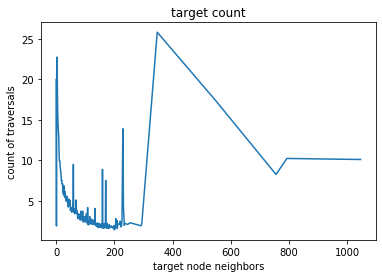

count mean
4.951777686963629
count max
160
-  ---------  --
1  0.243339    6
2  0.108732   11
3  0.0668301  16
-  ---------  --


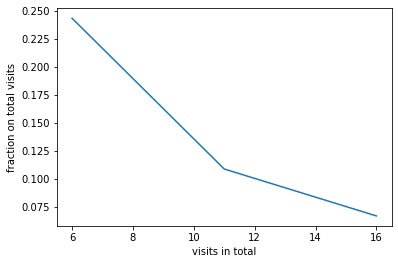

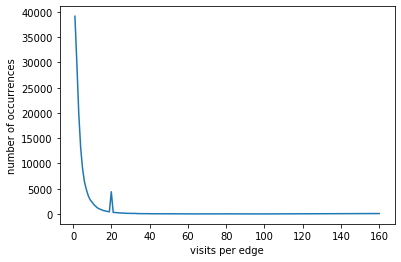

In [569]:
stats_analysis(df128)

In [236]:
with open("data/stats.json") as datafile:
    data = json.load(datafile)


In [237]:
df = pd.read_json("data/stats.json")

In [479]:
df = df128

In [ ]:
df.index.values

In [480]:
df2 = pd.DataFrame(df.stats.values.tolist(), index=df.index.values)

In [ ]:
df2.loc['(1096, 107)']

In [481]:
df3 = df2.loc[~df2.index.str.contains("None")]

In [ ]:
df4 = df2.loc[df2.index.str.contains("None")]

In [ ]:
df3

In [ ]:
df3

In [ ]:
df3.time_access.values.tolist()

In [482]:
df_time_access = pd.DataFrame(df3.time_access.values.tolist(), index=df3.index.values)

In [ ]:
df3.time_access.values.tolist()

In [483]:
df_time_access = df_time_access.fillna(0)

In [ ]:
df_time_access.idxmax()

In [484]:
counts = df_time_access.values.flatten()


In [485]:
counts2 = counts[(counts>0) & (counts<120)]

In [486]:
len(counts2[counts2==1])/len(counts2)

0.69602872834812

In [487]:
ratios = []
for i in range(1, 11):
    ratios.append(len(counts2[counts2==i])/len(counts2))

In [488]:
step_groupings = []
for i in range(1, 21):
    step_groupings.append((i, sum(counts2[counts2>i])/sum(counts2)))

In [489]:
step_groupings = np.array(step_groupings)
l1, l2 = zip(*step_groupings)

In [490]:
step_groupings

array([[1.00000000e+00, 5.56410931e-01],
       [2.00000000e+00, 3.17109743e-01],
       [3.00000000e+00, 1.97878497e-01],
       [4.00000000e+00, 1.34979265e-01],
       [5.00000000e+00, 9.79806264e-02],
       [6.00000000e+00, 7.44166254e-02],
       [7.00000000e+00, 5.96419287e-02],
       [8.00000000e+00, 4.90328670e-02],
       [9.00000000e+00, 4.00083560e-02],
       [1.00000000e+01, 3.23796113e-02],
       [1.10000000e+01, 2.67454816e-02],
       [1.20000000e+01, 2.31616737e-02],
       [1.30000000e+01, 2.05465462e-02],
       [1.40000000e+01, 1.93333746e-02],
       [1.50000000e+01, 1.88227284e-02],
       [1.60000000e+01, 1.86494182e-02],
       [1.70000000e+01, 1.85968061e-02],
       [1.80000000e+01, 1.85689527e-02],
       [1.90000000e+01, 1.85689527e-02],
       [2.00000000e+01, 0.00000000e+00]])

Text(0, 0.5, 'fraction of total traversals')

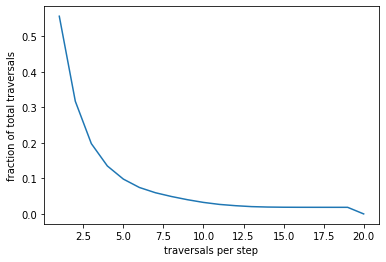

In [491]:


step_groupings_pd = pd.DataFrame()
step_groupings_pd['bound'] = l1
step_groupings_pd['fraction'] = l2

plt.plot(step_groupings_pd['bound'], step_groupings_pd['fraction'])
plt.xlabel("traversals per step")
plt.ylabel("fraction of total traversals")

Text(0, 0.5, 'fraction of total traversals')

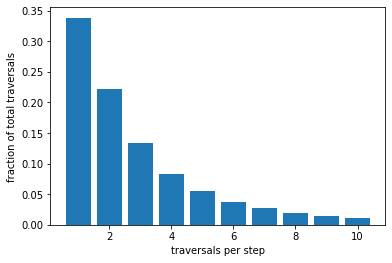

In [285]:
plt.bar(range(1,11), np.array(ratios))
plt.xlabel("traversals per step")
plt.ylabel("fraction of total traversals")

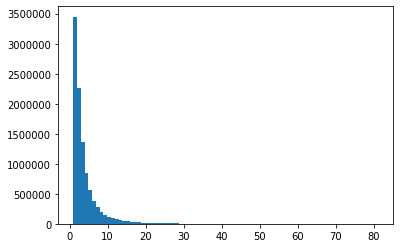

Text(0, 0.5, 'count')

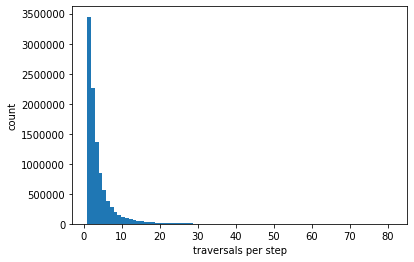

In [455]:
plt.hist(counts2, bins=int(max(counts2)))
plt.xlabel("traversals per step")
plt.ylabel("count")

Text(0.5, 0, 'count of traversals')

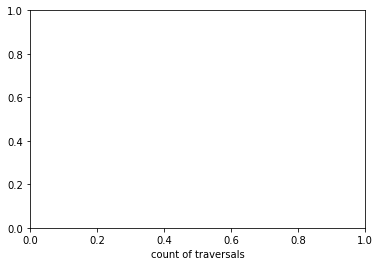

Text(0, 0.5, 'source node neighbors')

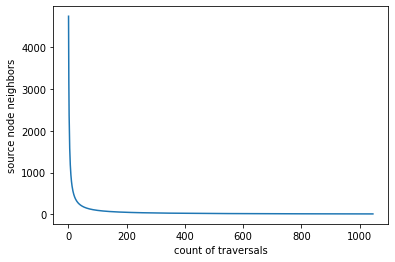

In [278]:
plt.plot(df2.groupby('source_neighbors').mean()['count'])
plt.xlabel("count of traversals")
plt.ylabel("source node neighbors")

In [492]:
count_mean = df2.groupby('source_neighbors').mean()['count']

In [493]:
count_mean

source_neighbors
1       90.000000
2       60.000000
3       45.000000
4       36.000000
5       30.000000
          ...    
347      1.276596
547      1.285714
755      1.276596
792      1.241379
1045     1.176471
Name: count, Length: 227, dtype: float64

In [494]:
count_mean_limit_100 = count_mean[count_mean.index < 100]
count_mean_limit_50 = count_mean[count_mean.index < 50]
count_mean_limit_10 = count_mean[count_mean.index < 10]

Text(0.5, 0, 'source node neighbors')

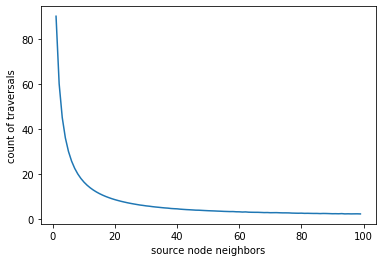

In [495]:
plt.plot(count_mean_limit_100)
plt.ylabel("count of traversals")
plt.xlabel("source node neighbors")

Text(0.5, 0, 'source node neighbors')

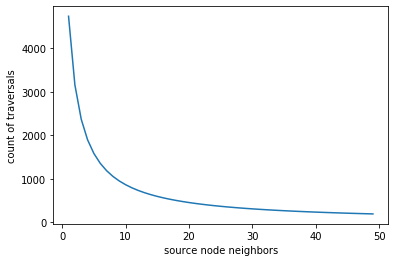

In [288]:
plt.plot(count_mean_limit_50)
plt.ylabel("count of traversals")
plt.xlabel("source node neighbors")

Text(0.5, 0, 'source node neighbors')

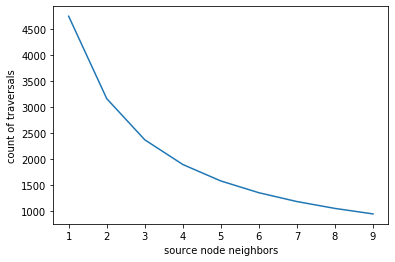

In [289]:
plt.plot(count_mean_limit_10)
plt.ylabel("count of traversals")
plt.xlabel("source node neighbors")

Text(0.5, 0, 'target node neighbors')

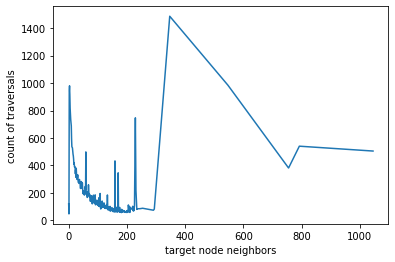

In [290]:
plt.plot(df2.groupby('target_neighbors').mean()['count'])
plt.ylabel("count of traversals")
plt.xlabel("target node neighbors")

In [496]:
df2['count'].mean()

4.951777686963629

In [497]:
df2['count'].median()

3.0

In [498]:
max(df2['count'])

160

In [499]:
df2['count']

(0, 1)          1
(0, 102)        1
(0, 103)        1
(0, 104)        1
(0, 106)        1
               ..
(999, 916)      3
(999, 925)      2
(999, 947)      2
(999, 968)      3
(999, None)    20
Name: count, Length: 146820, dtype: int64

In [535]:
count_groups = df2.groupby('count').size()


In [541]:
count_groups

count
1      39142
2      29954
3      19960
4      13087
5       8950
       ...  
91         5
93         2
94         3
100        1
160       75
Length: 92, dtype: int64

In [559]:
groupings_percentages = []
for i in range(1, max(df2['count']), 5):
    groupings_percentages.append((i, sum(count_groups[count_groups.index >= i])/sum(count_groups)))

In [560]:
groupings_percentages = np.array(groupings_percentages)
l1, l2 = zip(*groupings_percentages)


In [561]:
pd_groupings = pd.DataFrame()
pd_groupings['fraction'] = l2
pd_groupings['bound'] = l1

In [562]:
max(count_groups)

39142

In [563]:
pd_groupings

,fraction,bound
0,1.000000,1.0
1,0.243339,6.0
2,0.108732,11.0
3,0.066830,16.0
4,0.022408,21.0
5,0.014187,26.0
6,0.009651,31.0
7,0.006831,36.0
8,0.005136,41.0
9,0.004066,46.0


In [547]:
pd_groupings_sig = pd_groupings[(pd_groupings['fraction'] > 0.05) & (pd_groupings['fraction'] < 0.95)]

In [548]:
pd_groupings_sig

,fraction,bound
0,0.243339,5.0
1,0.066830,15.0


Text(0, 0.5, 'fraction on total visits')

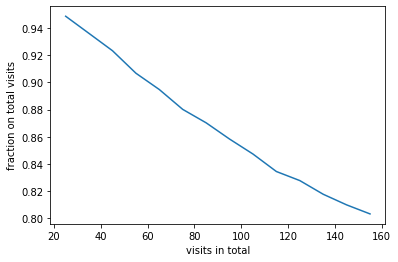

In [506]:
plt.plot(pd_groupings_sig['bound'], pd_groupings_sig['fraction'])
plt.xlabel("visits in total")
plt.ylabel("fraction on total visits")

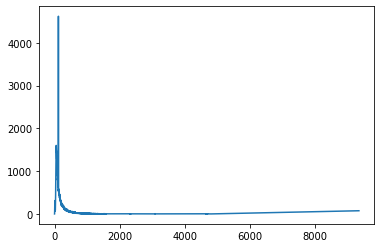

In [362]:
plt.plot(df2.groupby('count').size())

In [517]:
count_groups = df2.groupby('count').size()
count_groups_500 = count_groups[count_groups < 500]

In [518]:
count_groups[count_groups < 10]

count
60     9
63     4
64     5
65     3
66     4
67     4
69     9
71     7
72     5
73     8
74     7
76     9
77     3
83     3
84     9
86     7
87     7
88     5
89     7
91     5
93     2
94     3
100    1
dtype: int64

In [519]:
bins = range(0, max(df2['count']), 10)
pd.cut(count_groups, bins)

count
1               NaN
2               NaN
3               NaN
4               NaN
5               NaN
           ...     
91      (0.0, 10.0]
93      (0.0, 10.0]
94      (0.0, 10.0]
100     (0.0, 10.0]
160    (70.0, 80.0]
Length: 92, dtype: category
Categories (15, interval[int64]): [(0, 10] < (10, 20] < (20, 30] < (30, 40] ... (110, 120] < (120, 130] < (130, 140] < (140, 150]]

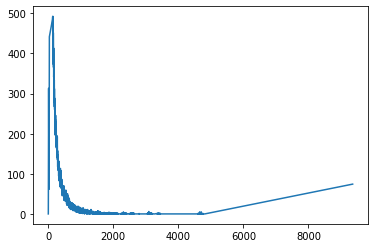

In [326]:
plt.plot(count_groups_500)

In [343]:
cut_df = pd.cut(count_groups, bins).to_frame()

In [359]:
cut_df.groupby(0).size().head(20)

0
(0, 10]       1562
(10, 20]       213
(20, 30]       101
(30, 40]        68
(40, 50]        62
(50, 60]        44
(60, 70]        39
(70, 80]        23
(80, 90]        31
(90, 100]       19
(100, 110]      17
(110, 120]      17
(120, 130]      12
(130, 140]      10
(140, 150]      10
(150, 160]       8
(160, 170]       9
(170, 180]      11
(180, 190]      12
(190, 200]       7
dtype: int64